# Tipos de datos

Es importante conocer con que tipos de datos estamos trabajando. Los datos pueden ser:

1. Cuantitativos o numéricos (discretos y continuos)
2. Cualitativos o categóricos
3. Ordinales

## Datos cuantitativos 

Son representados por números y son importantes si representan la medida de la cantidad observada 
de cierta característica. Pueden ser:

1. Discretos: solo pueder asuamir un valor de una lista de números específicos, pueden ser contados y listados.

2. Continuos: representan mediciones se suelen redondear a un número fijo de decimales para facilitar su manipulación.

## Datos cualitativos

Estos datos describen categorías no numéricas que representar determinada cualidad. Los datos categóricos pueden tomar valores numéricos (por ejemplo, "0" para indicar "masculino" y "1" para indicar "femenino"), pero esos números no tienen un sentido matemático.

## Datos ordinales

 Es una categoría intermedia entre los cuantitativos y los cualitativos. En estos datos existe un orden (primero, segundo, tercero, etc.) es decir, podemos establecer un ranking, es decir, los datos son cualitativos, pero los números colocados en cada categoría tienen un significado.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
mainpath = "../datasets/"
filename = "titanic-kaggle/train.csv"
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv (fullpath)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data1 = data

In [4]:
data1 = data1.drop(['Cabin','Name','Ticket'], axis=1)
data1 = data1[data1['Embarked'].notna()]
data1['Age'] = data1['Age'].fillna(-1)

### Datos ordinales

data1['Embarked'] = data1['Embarked'].map({'Q': 2, 'C': 1, 'S': 0})
data1['Sex'] = data1['Sex'].map({'female': 1, 'male': 0})
data1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,-1.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [6]:
# Estadistica basica de variables númericas 
data1.describe() 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,23.541249,0.524184,0.382452,32.096681,0.362205
std,256.998173,0.486260,0.834700,0.477538,17.834487,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [7]:
"""
Categorización de los datos en hombre/mujeres vivos/muertos
"""
live = data1[(data1["Survived"]==1)]
dead = data1[(data1["Survived"]==0)]
livem = data1[(data1["Survived"]==1) & (data1["Sex"] == 0)]
livef = data1[(data1["Survived"]==1) & (data1["Sex"] == 1)]
deadm = data1[(data1["Survived"]==0) & (data1["Sex"] == 0)]
deadf = data1[(data1["Survived"]==0) & (data1["Sex"] == 1)]
print("De los",data1.shape[0], "pasajeros del titanic","sobrevivieron",live.shape[0],"y murieron",dead.shape[0])
print("De los",live.shape[0], "pasajeros que sobrevivieron",livem.shape[0],"eran hombres y",livef.shape[0],"eran mujeres")
print("De los",dead.shape[0], "pasajeros que murieron",deadm.shape[0],"eran hombres y",deadf.shape[0],"eran mujeres")

De los 889 pasajeros del titanic sobrevivieron 340 y murieron 549
De los 340 pasajeros que sobrevivieron 109 eran hombres y 231 eran mujeres
De los 549 pasajeros que murieron 468 eran hombres y 81 eran mujeres


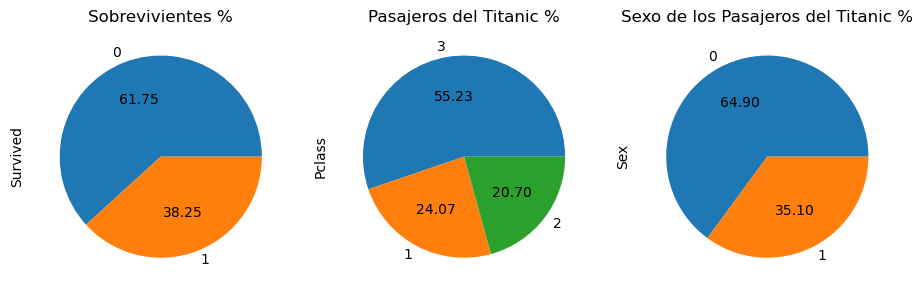

In [8]:
# gráfico de barras de frecuencias relativas.
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plot = (100 * data1['Survived'].value_counts() / len(data1['Survived'])).plot(
kind='pie',  autopct='%.2f',title='Sobrevivientes %')
plt.subplot(1,4,2)
plot = (100 * data1['Pclass'].value_counts() / len(data1['Pclass'])).plot(
kind='pie' , autopct='%.2f', title='Pasajeros del Titanic %')
plt.subplot(1,4,3)
plot = (100 * data1['Sex'].value_counts() / len(data1['Sex'])).plot(
kind='pie' , autopct='%.2f', title='Sexo de los Pasajeros del Titanic %')
#plt.subplot(1,4,4)
#plot = (100 * data1['Age'].value_counts() / len(data1['Age'])).plot(
#kind='pie' , autopct='%.2f', title='Edad de los Pasajeros del Titanic %')


# Selección de atributos

Proceso para seleccionar un subconjunto de atributos (columnas) relevantes para la construcción del modelo predictivo. Se utiliza para identificar y eliminar los atributos innecesarios, irrelevantes y/o redundantes que no contribuyen al modelo predictivo o disminuyen su precisión.

Para hacer la selección de atributos, hay que tener en cuenta la relación que existe entre ellos  y así poder eliminarlos de forma individual (univariante) o un un grupo de atributos en forma conjunta (multivariante).

Ejemplo: 

* **Modelo bayesiano**: cada atributo es independiente, por lo tanto, podemos hacer una selección de variable univariante.
* **Modelo de red neuronal**: no asume la independencia de los atributos (usa todos los disponibles) por lo tanto, podemos hacer una selección de variable multivariante.

## Métodos para selección de atributos

1. **Métodos de filtrado**

Aplican una medida estadística para asignar una puntuación a cada atributo. Los atributos luego son clasificados de acuerdo a su puntuación y son, o bien seleccionados para su conservación o eliminados del conjunto de datos. Los métodos de filtrado son a menudo univariantes y consideran a cada atributo en forma independiente, o con respecto a la variable dependiente.

Ejemplos de estos métodos son: coeficientes de correlación de Pearson, prueba de $\chi^2$, prueba de Fisher, ganancia de información.

2. **Métodos empaquetados**

Selección de un conjunto de atributos como un problema de búsqueda, en donde las diferentes combinaciones son evaluadas y comparadas. Para hacer estas evaluaciones se utiliza un modelo predictivo y luego se asigna una puntuación a cada combinación basada en la precisión del modelo.

Ejemplo de este método es el algoritmo de eliminación recursiva (forward, backward) de atributos.

Bibliografía:

https://en.wikipedia.org/wiki/Feature_selection

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223



# Método de filtrado

In [9]:
### Coeficientes de correlación de Pearson
### 
def train_corr(data): 
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

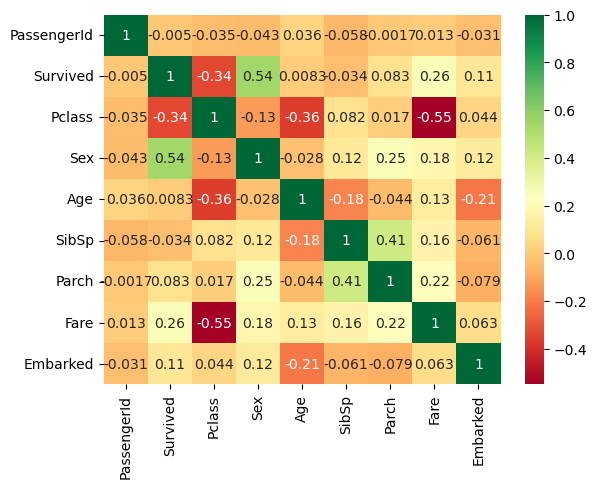

In [10]:
train_corr(data1)

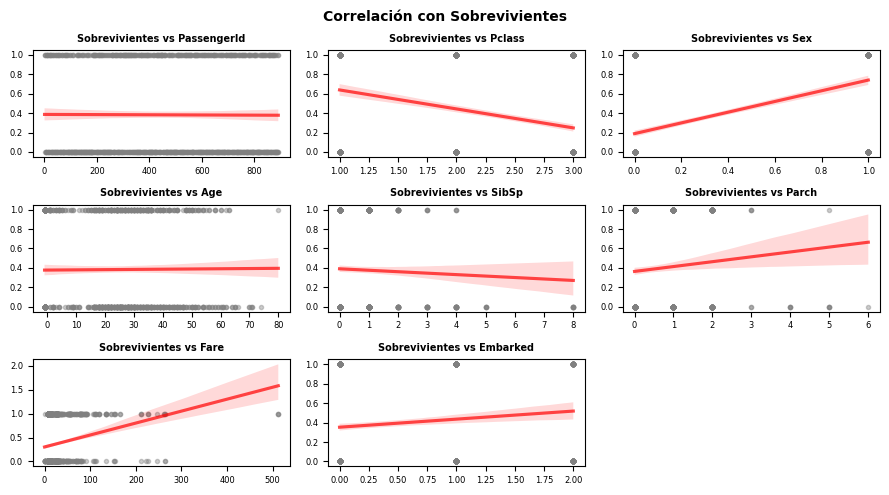

In [11]:
# Variable numérica
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas = data1.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Survived') # objetivo

for i, colum in enumerate(columnas):
    sns.regplot(
        x           = data1[colum],
        y           = data1['Survived'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Sobrevivientes vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Sobrevivientes', fontsize = 10, fontweight = "bold");

# scikit-learn feature selection

https://scikit-learn.org/stable/modules/feature_selection.html

In [12]:
from sklearn.feature_selection import SelectKBest #SelectKBest removes all but the highest scoring features
from sklearn.feature_selection import chi2, f_classif #Fisher
from sklearn.feature_selection import RFE # recursive feature elimination
from sklearn.ensemble import ExtraTreesClassifier #decision trees 

### Separamos las columnas objetivo

* Objetivo: y
* Atributos: x

En este caso queremos saber quien sobrevivio

In [13]:
data1.isnull().any().any()

False

In [14]:
data2 = data1

El algoritmo va a aplicar la prueba de Fisher a todos los atributos y va a seleccionar los que mejor resultado obtuvieron.

In [15]:
x = data2['Survived']
k = 4  # número de atributos a seleccionar
entrenar = data2.drop(['Survived'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, x)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['Pclass', 'Sex', 'Fare', 'Embarked']

# Métodos empaquetados: Eliminación recursiva

Selecciona recursivamente un número cada vez más pequeño de atributos. Primero comienza con todos los atributos del dataset y luego en cada pasada va eliminando aquellos que tenga el menor coeficiente de importancia hasta alcanzar el número de atributos deseado

Es más precisa, pero consume mucho más recursos, ya que requiere entrenar un modelo predictivo.

In [16]:
modelo = ExtraTreesClassifier() 
erec = RFE(modelo)  
erec = erec.fit(entrenar, x)

In [17]:
atrib = erec.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['PassengerId', 'Sex', 'Age', 'Fare']

In [18]:
# Importancia de atributos.
modelo.fit(entrenar, x)
modelo.feature_importances_[:4]

array([0.17491237, 0.10074366, 0.27344884, 0.15977818])

In [19]:
np.sort(modelo.feature_importances_)[::-1][:4]

array([0.27344884, 0.17491237, 0.16680619, 0.15977818])